ChEn-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **29Sep21**

# 05c. Rayleigh-Ritz Method w/ Finite Element Lagrange Basis Functions
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Dirichlet/Neumann Boundary Conditions](#problem)
1. [Rayleigh-Ritz Method with Dirichlet/Neumann Boundary Conditions](#rayleigh-ritz)
   + [Data](#data)
   + [Lift function](#lift-function)
   + [Finite Element Lagrange Basis Functions](#fem-lagrange-basis-inhomogeneous)
   + [Results](#results)
---

## [Objectives](#toc)<a id="obj"></a>

 + Describe the Rayleigh-Ritz method for solving linear differential equations with symmetric positive definite operators ([OneNote notes: rayleigh-ritz-method](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EsTzIb2Mcv5OkcSk0kSXXF8BXM4OnlzGfAd7sdcWLky-Gw?e=nglTrN).
 + Use the function approximation theory described in the course (see previous notebooks and notes).
 + Apply the finite element Lagrange basis functions.

## [Poisson Problem with Dirichlet/Neumann Boundary Conditions](#toc)<a id="problem"></a>

The following sections describe what is referred to in the literature as the one-dimensional Poisson problem with Dirichlet boundary conditions. This is a classical boundary-value problem of mathematics.

Solve the Poisson model problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D(x)\, u'\bigr)'(x) + S(x)\,u(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in [a,b], \\
 u(a) &= u_a, \\
 q_n(b) &= q_{nb}.
\end{align*}
   
This problem is linear and has an analytical solution for given data: diffusion coefficient, $D(x)$, source, $S(x)$ slope, source bias, $f(x)$. The *diffusion flux* associated to the quantity $u$, is denoted $q := -D(x)\,u'$, and it is often of interest as a derived quantity.

The normal diffusive flux at $x=b$ is $q_n(b) = -D\,u'(b) = q_{nb}$

The values of the dependent variable are given on the two end points of the domain. This is called *essential* boundary conditions or  *Dirichlet boundary conditions*. If the values are equal to zero, the boundary condition is referred to as homogeneous.

## [Rayleigh-Ritz Method w/ Dirichlet/Neumann Boundary Conditions](#toc)<a id="rayleigh-ritz"></a>

Find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals  \bigr\}$ such that it minimizes the constrained Poisson energy norm:

\begin{equation*}
  \min\limits_{u_0\, \in\, V} \norm{u_0+w-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(a) = u_N(b) = 0, (u'_N,u'_N) < \infty \bigr\}$, $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$, and any $w \in V$ with $w(a) = u_a$, $w(b) = 0$ is called the *lift* function.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_i,\phi'_j) + (S\,\phi_i,\phi_j)  $
  + $b_i = (f,\phi_i) - (D\,w',\phi'_i) - (S\,w,\phi_i) - q_{nb}\,\phi_i(b)$
  
This formulation accommodates basis functions that do not satisfy the boundary conditions directly, *i.e* boundary conditions are not built into $V_N(a,b)$.

### [Data](#toc)<a id="data"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 25 cm
> + $u_a$ = 2 g/cc
> + $q_{nb}$ = 0 g/cm^2-s
> + D = 0.1 cm^2/s
> + S = 2e-3 $s^{-1}$
> + f = 1e-3 g/cc-s

In [1]:
'''Domain'''

x_a = 0
x_b = 25

x_length = x_b - x_a

In [2]:
'''Parameters and data'''

diff_coeff = 0.1
source_bias_value = 1e-3
source_slope_value = 1e-3

u_a = 2
q_nb = 0.01

# shape pts =  3


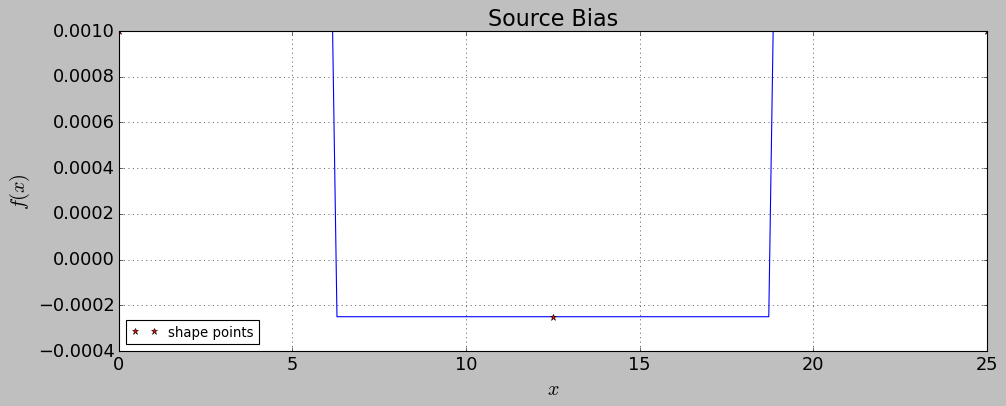

In [5]:
'''Generate the source bias'''

try:    
    from engy_5310.toolkit import TargetFunction   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

shape_pts = [(x_a,source_bias_value), (x_b,source_bias_value)]
shape_pts = [(x_a,source_bias_value), ((x_a+x_b)/2,1.3*source_bias_value), (x_b,source_bias_value)]
shape_pts = [(x_a,source_bias_value), ((x_b+x_a)/2,-source_bias_value/4), (x_b,source_bias_value)]
#shape_pts = [(x_a,source_bias_value), ((x_b+x_a)/8,2*source_bias_value), ((x_b+x_a)/4,source_bias_value), (3*(x_b+x_a)/4,2*source_bias_value), (x_b,source_bias_value)]

print('# shape pts = ', len(shape_pts))

source_bias = TargetFunction(shape_pts, type='stepwise')
#source_bias = TargetFunction(shape_pts, type='linear')
#source_bias = TargetFunction(shape_pts, type='legendre')
  
source_bias.plot(n_plot_pts=200, show_shape_pts=True, title='Source Bias')

# shape pts =  5


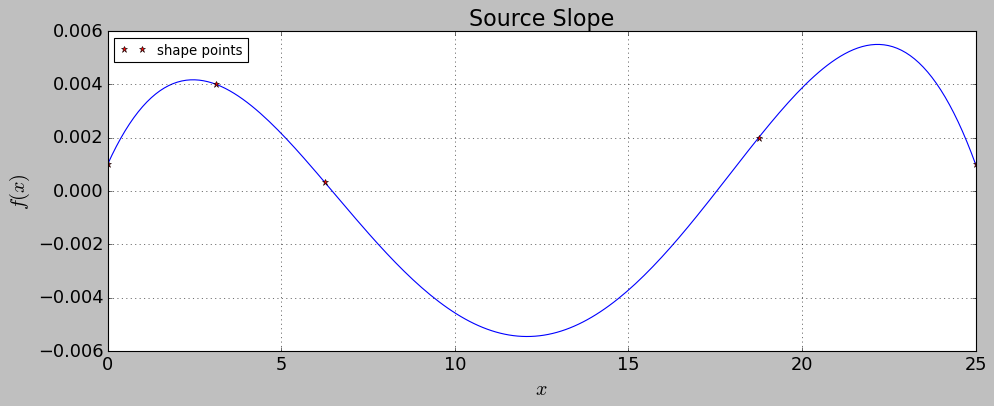

In [6]:
'''Generate the source slope'''

try:    
    from engy_5310.toolkit import TargetFunction   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

shape_pts = [(x_a,source_slope_value), (x_b,source_slope_value)]
shape_pts = [(x_a,source_slope_value), ((x_b+x_a)/2,source_slope_value/4), (x_b,source_slope_value)]
shape_pts = [(x_a,source_slope_value), ((x_b+x_a)/8,4*source_slope_value), ((x_b+x_a)/4,source_slope_value/3), (3*(x_b+x_a)/4,2*source_slope_value), (x_b,source_slope_value)]

print('# shape pts = ', len(shape_pts))

source_slope = TargetFunction(shape_pts, type='legendre')
#source_slope = TargetFunction(shape_pts, type='linear')
  
source_slope.plot(n_plot_pts=200, show_shape_pts=True, title='Source Slope')

### [Lift Function](#toc)<a id="lift-function"></a>
Since $w\in V(a,b)$, construct as follows $w = \sum\limits_{i=1}^N\,\alpha_i\,\phi_i$ such that $w(a) = u_a$.

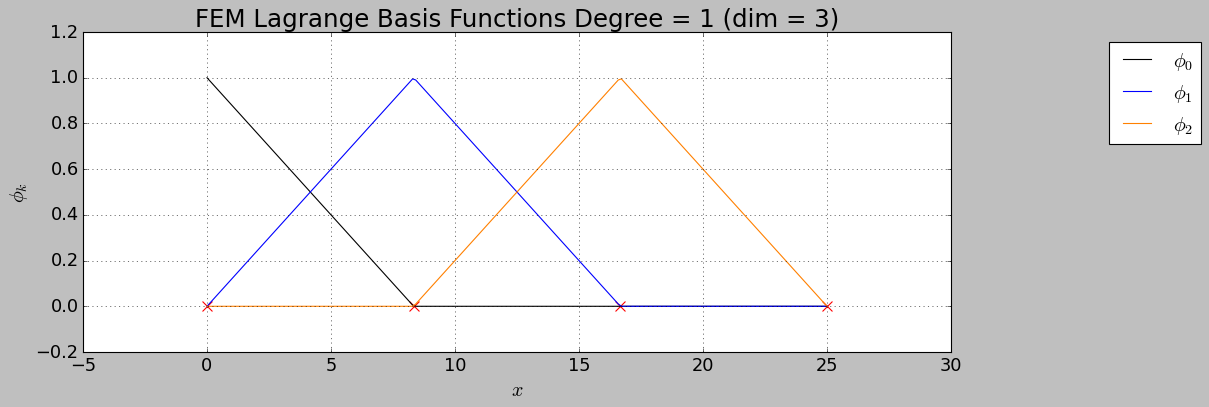

In [7]:
'''Build the basis functions'''

degree = 1
n_elem = 3

try:    
    from engy_5310.toolkit import FEMBasis  
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
lift_basis = FEMBasis(degree=degree, n_elem=n_elem, x_min=x_a, x_max=x_b, bc_x_max='dirichlet')
lift_basis.plot(n_plot_pts=300)

In [8]:
'''Build the coefficients of the lift function'''
import numpy as np
alpha_vec = np.zeros(len(lift_basis.basis_func_list))
alpha_vec[0] = u_a

In [9]:
'''Build the lift function'''

def w_lift(x):
    a_mtrx = lift_basis.evaluation_matrix(x)
    return a_mtrx@alpha_vec

In [10]:
'''Build the lift function derivative'''

def w_lift_prime(x):
    a_mtrx = lift_basis.evaluation_matrix(x, derivative=True)
    return a_mtrx@alpha_vec

In [11]:
'''Test boundary values'''

print('w(a) = ',w_lift(x_a), ' w(b) = ',w_lift(x_b))

w(a) =  [2.]  w(b) =  [0.]


### [Finite Element Lagrange Basis Functions](#toc)<a id="fem-lagrange-basis-inhomogeneous"></a>

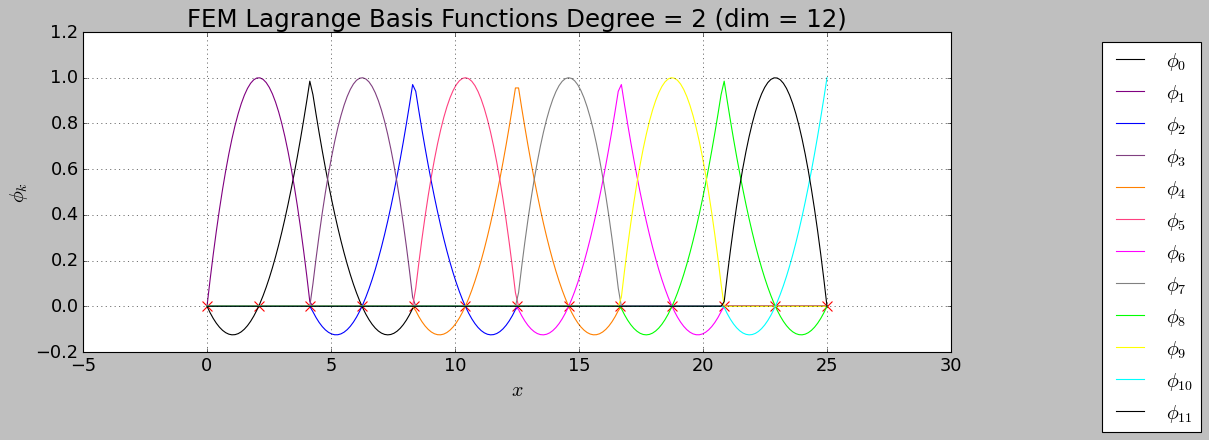

In [12]:
'''Build the basis functions'''

degree = 2
n_elem = 6

try:    
    from engy_5310.toolkit import FEMBasis  
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
femlb = FEMBasis(degree=degree, n_elem=n_elem, x_min=x_a, x_max=x_b, bc_x_min='dirichlet', bc_x_max='neumann')
femlb.plot(n_plot_pts=300)

In [13]:
'''Build the matrix of coefficients of the linear system'''

import numpy as np
n = len(femlb.basis_func_list)
a_mtrx = np.zeros((n, n), dtype=np.float64)
  
for i,phi_prime_i in enumerate(femlb.basis_func_prime_list):
    for j,phi_prime_j in enumerate(femlb.basis_func_prime_list):
        (a_ij, _) = femlb.inner_product(phi_prime_j, phi_prime_i)
        a_mtrx[i,j] = a_ij * diff_coeff
        
for i,phi_i in enumerate(femlb.basis_func_list):
    for j,phi_j in enumerate(femlb.basis_func_list):
        s_x_phi_j = lambda x: source_slope.values(x) * phi_j(x)
        (a_ij, _) = femlb.inner_product(s_x_phi_j, phi_i)
        a_mtrx[i,j] += a_ij

In [14]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')

A is full rank.


In [15]:
'''Build load vector'''

b_vec = np.zeros(n, dtype=np.float64)

for i, phi_i in enumerate(femlb.basis_func_list):
    (b_vec[i], _) = femlb.inner_product(source_bias, phi_i) 
    (tmp1, _) = femlb.inner_product(w_lift_prime, femlb.basis_func_prime_list[i], epsrel=1e-4, epsabs=1e-4, limit=1000)
    tmp1 *= diff_coeff
    s_x_w = lambda x: source_slope.values(x) * w_lift(x)
    (tmp2, _) = femlb.inner_product(s_x_w, phi_i, epsrel=1e-4, epsabs=1e-4, limit=1000)
    b_vec[i] -= tmp1 + tmp2
    b_vec[i] -= q_nb * phi_i(x_b)

In [16]:
'''Compute optimal coefficient vector'''

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [17]:
'''Build the best approximation function in V_N'''

def u_star(x):
    a_mtrx = femlb.evaluation_matrix(x)
    u_0 = a_mtrx@c_star_vec
    a_mtrx = lift_basis.evaluation_matrix(x)
    w = a_mtrx@alpha_vec
    return u_0 + w

### [Results: Dirichlet/Neumann Boundary Conditions Case](#toc)<a id="results"></a>

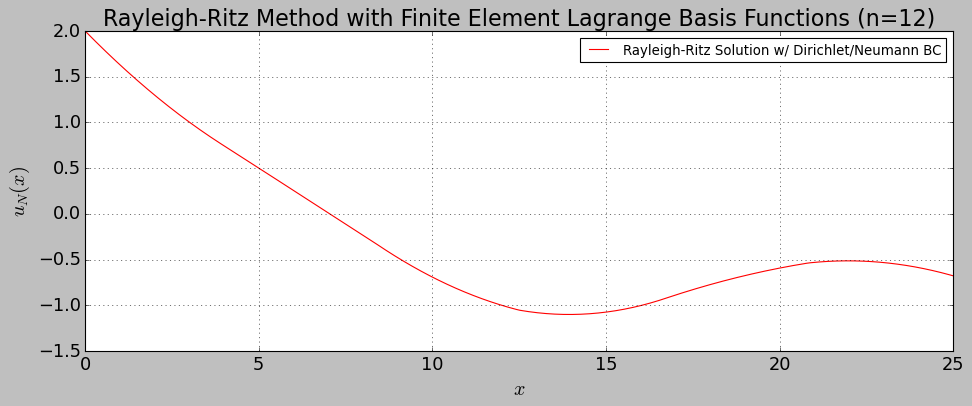

In [18]:
'''Rayleigh Ritz Method with Fourier Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x, u_values, 'r-', label='Rayleigh-Ritz Solution w/ Dirichlet/Neumann BC')

plt.title(r'Rayleigh-Ritz Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$u_N(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [19]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ',u_star(x_a), ' u_N(b) = ',u_star(x_b))

u_N(a) =  [2.]  u_N(b) =  [-0.67771]
